In [1]:
import pandas as pd
import numpy as np

# graphics
import seaborn as sns
import matplotlib.pyplot as plt
from graphic import parameters as param
plt.style.use('seaborn')

# project
from parse import data
from utils.common import country_order
from geo import geography as geof

In [2]:
fell = data.get_fallen_meteorites()
found =data.get_found_meteorites()

In [3]:
print("Data about fell meteorites")
print("--------------------------")
print(f'Number of samples {len(fell)}')
print(f'Number of columns {len(fell.columns)}')

Data about fell meteorites
--------------------------
Number of samples 1094
Number of columns 17


## Data by year

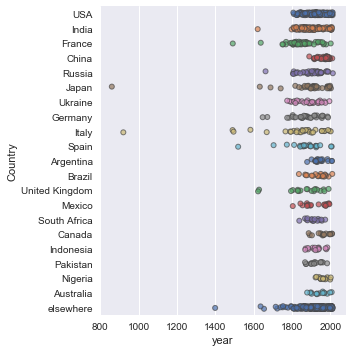

In [4]:
sns.catplot(data=fell, y='country_alt', x='year', order=country_order, **param.catplot_args)
plt.ylabel('Country');

## Data by year (after `year` variable - default 1900)

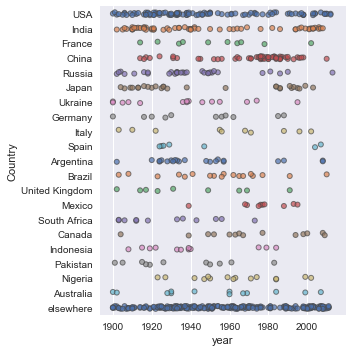

In [5]:
year = 1900
sns.catplot(data=fell[fell.year >= year], y='country_alt', x='year', order=country_order, **param.catplot_args)
plt.ylabel('Country');

In [6]:
print(f"Average number of meteorites fallen per year (after {year})")
print(fell[fell.year >= year].groupby('year').count()['name'].mean())
print(f"Average number of  meteorites fallen per year [>= 1kg] (after {year})")
print(fell[(fell.year >= year) & (fell.mass >= 1)].groupby('year').count()['name'].mean())

Average number of meteorites fallen per year (after 1900)
6.15929203539823
Average number of  meteorites fallen per year [>= 1kg] (after 1900)
4.151785714285714


## Distribution of masses

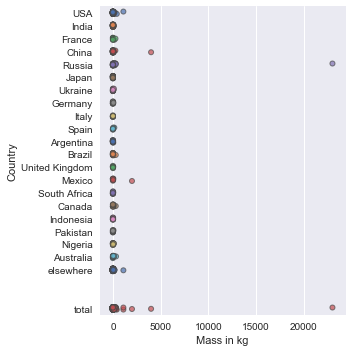

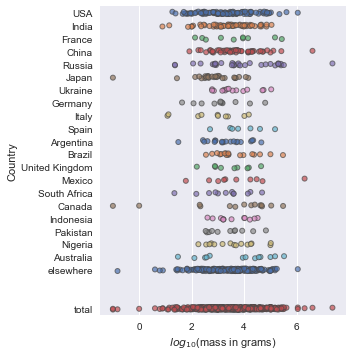

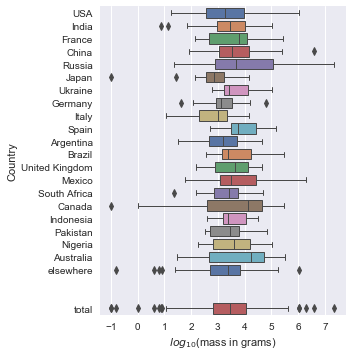

In [7]:
df_fell_copy = fell[fell.mass != 0].copy()
df_fell_copy['country_alt'] = 'total'
df_tot = pd.concat((fell, df_fell_copy))

sns.catplot(data=df_tot[df_tot.year >= 1900], y='country_alt', x='mass', order=country_order + [' ', '  ', 'total'], **param.catplot_args)
plt.ylabel('Country')
plt.xlabel('Mass in kg');
sns.catplot(data=df_tot[df_tot.year >= 1900], y='country_alt', x='log_mass', order=country_order + [' ', '  ', 'total'], **param.catplot_args)
plt.ylabel('Country')
plt.xlabel('$log_{10}$(mass in grams)');

sns.catplot(data=df_tot[df_tot.year > 1900], y='country_alt', x='log_mass', palette='deep', linewidth=1, kind='box', order=country_order + [' ', '  ', 'total'])
plt.xticks(np.arange(-1, 8))
plt.ylabel('Country')
plt.xlabel('$log_{10}$(mass in grams)');

## Mateors by mass

Text(-50.824999999999996, 0.5, 'Country')

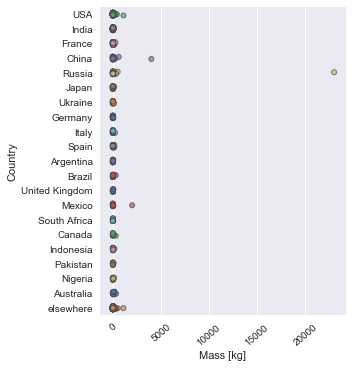

In [8]:
sns.catplot(data=fell, y='country_alt', x='mass', order=country_order, hue='country_alt', legend=False, **param.catplot_args)
plt.xticks(rotation='40')
plt.xlabel('Mass [kg]')
plt.ylabel("Country")

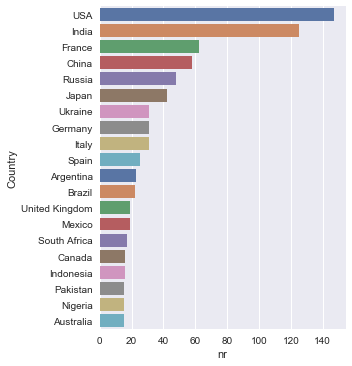

In [9]:
bar_plot_order = country_order.copy()
bar_plot_order.remove('elsewhere')
sns.catplot(data=fell, y='country_alt', kind='count', order=bar_plot_order, palette='deep')
plt.xlabel('nr')
plt.ylabel("Country");

## World map

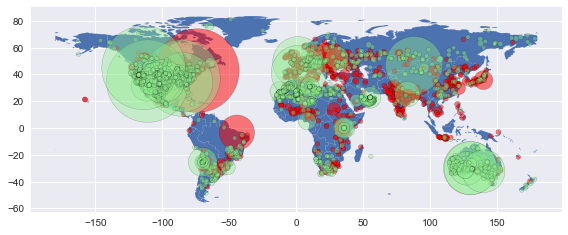

In [10]:
gdf = geof.load_world_data()
masses = fell[fell.mass != 0].mass
masses_found = found[found.mass != 0].mass
sizes = param.map_variable_to_dot_size(masses)
sizes_found = param.map_variable_to_dot_size(masses_found)

gdf.plot()
plt.scatter(fell['reclong'], fell['reclat'], s=sizes, **param.scatter_args)
plt.scatter(found['reclong'], found['reclat'], s=sizes_found, **param.scatter_args_alt)
plt.tight_layout()